# Vehicle Detection

## Import Library

In [1]:
import os
import time
import math
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

## Load Data

In [2]:
VEHICLES_DIR = '../input/vehicle-detection-image-set/data/vehicles'
NON_VEHICLES_DIR = '../input/vehicle-detection-image-set/data/non-vehicles'

In [3]:
vehicles_image_names = os.listdir(VEHICLES_DIR)
non_vehicles_image_names = os.listdir(NON_VEHICLES_DIR)

In [4]:
print('TOTAL NO. OF VEHICLE IMAGES:', len(vehicles_image_names))
print('TOTAL NO. OF NON-VEHICLE IMAGES:', len(non_vehicles_image_names))

TOTAL NO. OF VEHICLE IMAGES: 8792

TOTAL NO. OF NON-VEHICLE IMAGES: 8968


In [5]:
print(vehicles_image_names[:10])
print(non_vehicles_image_names[:10])

['right (28).png', '4353.png', '5511.png', '2664.png', '2539.png', '5703.png', '1231.png', '1017.png', '4803.png', 'left (153).png']

['image3300.png', 'image1317.png', 'image2473.png', 'image2242.png', 'extra5509.png', 'image1268.png', 'image1880.png', 'extra3013.png', 'extra3567.png', 'extra5378.png']


## Create Train Test Directory

In [6]:
BASE_DIR = '../tmp/'
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
TEST_DIR = os.path.join(BASE_DIR, 'test')
VEHICLES_TRAIN_DIR = os.path.join(TRAIN_DIR, 'vehicles')
NON_VEHICLES_TRAIN_DIR = os.path.join(TRAIN_DIR, 'non-vehicles')
VEHICLES_TEST_DIR = os.path.join(TEST_DIR, 'vehicles')
NON_VEHICLES_TEST_DIR = os.path.join(TEST_DIR, 'non-vehicles')

In [7]:
TRAIN_SIZE = 0.8

In [8]:
train_vehicles, test_vehicles = train_test_split(
    vehicles_image_names, train_size=TRAIN_SIZE, shuffle=True, random_state=1
)

train_non_vehicles, test_non_vehicles = train_test_split(
    non_vehicles_image_names, train_size=TRAIN_SIZE, shuffle=True, random_state=1
)

In [9]:
print('TOTAL NO. OF TRAIN VEHICLE IMAGES:', len(train_vehicles))
print('TOTAL NO. OF TRAIN NON-VEHICLE IMAGES:', len(train_non_vehicles))

print('TOTAL NO. OF TEST VEHICLE IMAGES:', len(test_vehicles))
print('TOTAL NO. OF TEST NON-VEHICLE IMAGES:', len(test_non_vehicles))

TOTAL NO. OF TRAIN VEHICLE IMAGES: 7033

TOTAL NO. OF TRAIN NON-VEHICLE IMAGES: 7174

TOTAL NO. OF TEST VEHICLE IMAGES: 1759

TOTAL NO. OF TEST NON-VEHICLE IMAGES: 1794


In [10]:
def move_images(image_list, old_dir_path, new_dir_path):
    if not os.path.exists(new_dir_path):
        os.makedirs(new_dir_path)
    
    for file_name in image_list:
        shutil.copy(
            os.path.join(old_dir_path, file_name),
            os.path.join(new_dir_path, file_name)
        )
    print(f'{len(image_list)} IMAGES COPIED TO {new_dir_path}')

In [11]:
move_images(train_vehicles, VEHICLES_DIR, VEHICLES_TRAIN_DIR)
move_images(train_non_vehicles, NON_VEHICLES_DIR, NON_VEHICLES_TRAIN_DIR)

move_images(test_vehicles, VEHICLES_DIR, VEHICLES_TEST_DIR)
move_images(test_non_vehicles, NON_VEHICLES_DIR, NON_VEHICLES_TEST_DIR)

7033 IMAGES COPIED TO ../tmp/train/vehicles

7174 IMAGES COPIED TO ../tmp/train/non-vehicles

1759 IMAGES COPIED TO ../tmp/test/vehicles

1794 IMAGES COPIED TO ../tmp/test/non-vehicles


In [12]:
len(os.listdir(VEHICLES_TRAIN_DIR))

7033

## Preprocessing

In [13]:
IMG_SIZE = 256

In [14]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    class_mode='binary'
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='binary'
)

Found 14207 images belonging to 2 classes.

Found 3553 images belonging to 2 classes.


## Model

In [15]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D(2, 2),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

2022-07-24 20:03:17.726052: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

2022-07-24 20:03:17.830852: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

2022-07-24 20:03:17.831742: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

2022-07-24 20:03:17.833275: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA

To enable them in other operations, rebuild TensorFlow with the appropriate co

Model: "sequential"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


conv2d (Conv2D)              (None, 254, 254, 32)      896       

_________________________________________________________________

max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         

_________________________________________________________________

conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     

_________________________________________________________________

max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         

_________________________________________________________________

flatten (Flatten)            (None, 246016)            0         

_________________________________________________________________

dense (Dense)                (None, 1)                 246017    


Total params: 265,409

Trainable params: 265,409

Non-trainable params: 0

_______________________________

## Model Train

In [16]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5
)

model_path = 'vehicle_detection.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    save_best_only=True
)

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=40,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[early_stopping, model_checkpoint]
)

2022-07-24 20:03:20.733697: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40


2022-07-24 20:03:22.236000: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


444/444 [==============================] - 37s 68ms/step - loss: 0.2041 - accuracy: 0.9169 - val_loss: 0.1304 - val_accuracy: 0.9612

Epoch 2/40

444/444 [==============================] - 31s 70ms/step - loss: 0.0645 - accuracy: 0.9778 - val_loss: 0.0637 - val_accuracy: 0.9786

Epoch 3/40

444/444 [==============================] - 28s 63ms/step - loss: 0.0360 - accuracy: 0.9882 - val_loss: 0.0684 - val_accuracy: 0.9778

Epoch 4/40

444/444 [==============================] - 28s 62ms/step - loss: 0.0292 - accuracy: 0.9899 - val_loss: 0.0333 - val_accuracy: 0.9879

Epoch 5/40

444/444 [==============================] - 29s 64ms/step - loss: 0.0304 - accuracy: 0.9889 - val_loss: 0.0509 - val_accuracy: 0.9848

Epoch 6/40

444/444 [==============================] - 28s 63ms/step - loss: 0.0233 - accuracy: 0.9919 - val_loss: 0.0410 - val_accuracy: 0.9848

Epoch 7/40

444/444 [==============================] - 28s 62ms/step - loss: 0.0126 - accuracy: 0.9960 - val_loss: 0.0266 - val_accuracy

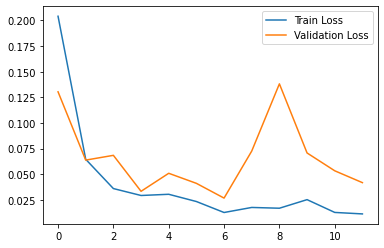

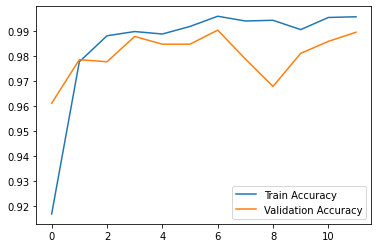

In [18]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

## Save Model

In [19]:
saved_model = tf.keras.models.load_model(model_path)
saved_model.evaluate(test_generator)

112/112 [==============================] - 6s 50ms/step - loss: 0.0266 - accuracy: 0.9904


[0.026648452505469322, 0.9904305934906006]